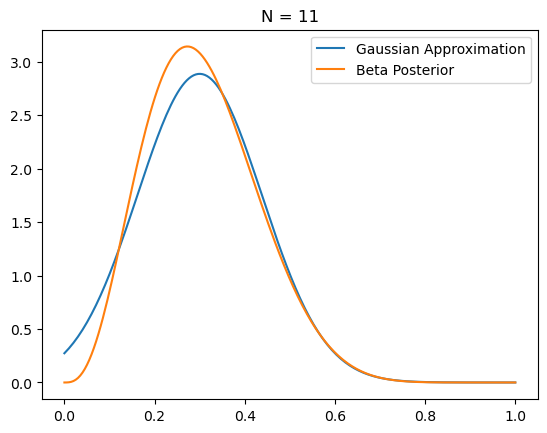

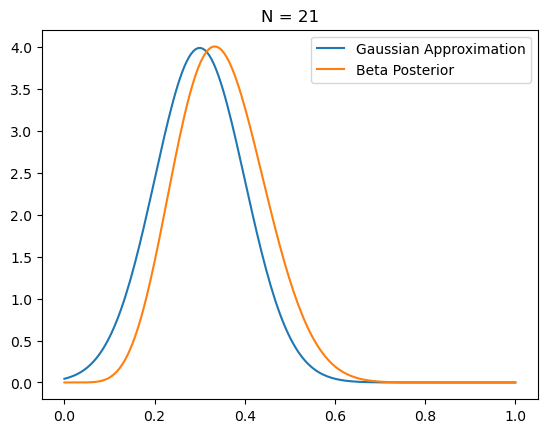

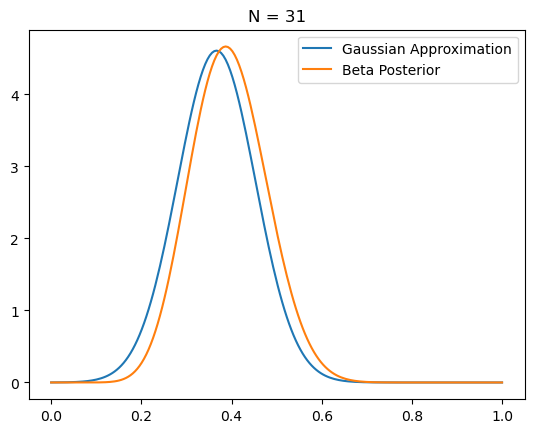

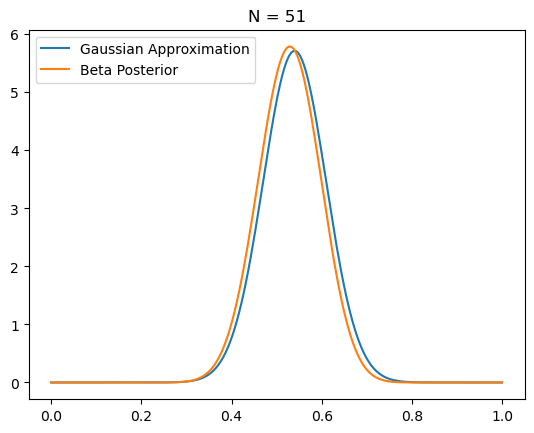

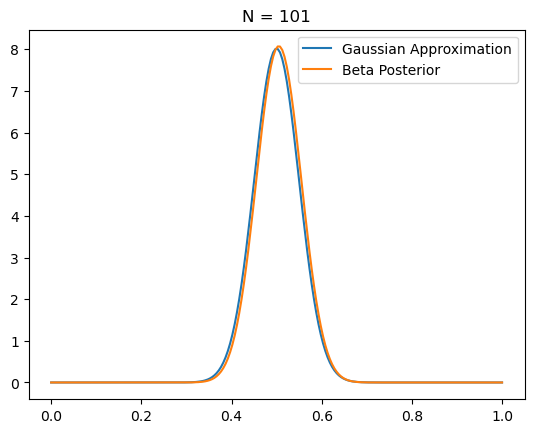

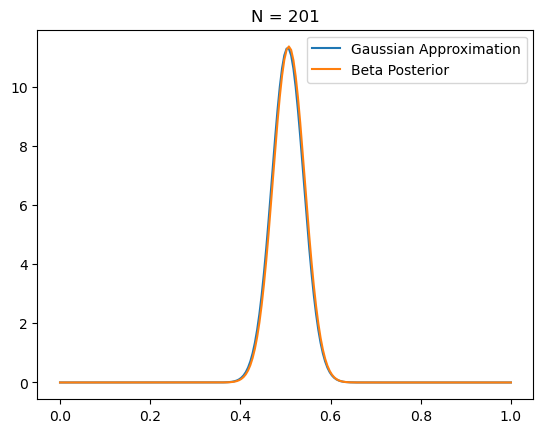

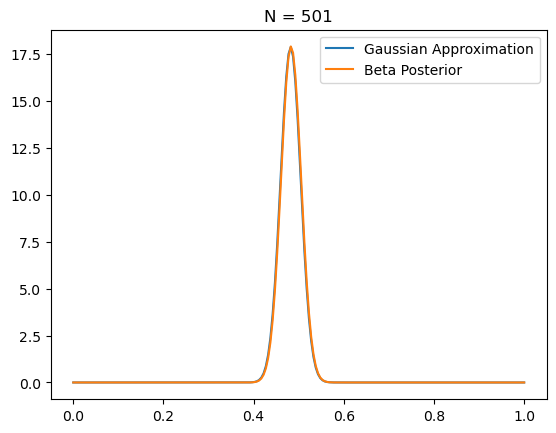

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm

T = 501 # number of coin tosses
true_ctr = 0.5
a, b = 1, 1 # beta priors
plot_indices = (10, 20, 30, 50, 100, 200, 500)
data = np.empty(T)
for i in range(T):
  x = 1 if np.random.random() < true_ctr else 0
  data[i] = x

  # update a and b
  a += x
  b += 1 - x

  if i in plot_indices:
    # maximum likelihood estimate of ctr
    p = data[:i].mean()
    n = i + 1 # number of samples collected so far
    std = np.sqrt(p*(1-p)/n)
    
    # gaussian
    x = np.linspace(0, 1, 200)
    g = norm.pdf(x, loc=p, scale=std)
    plt.plot(x, g, label='Gaussian Approximation')

    # beta
    posterior = beta.pdf(x, a=a, b=b)
    plt.plot(x, posterior, label='Beta Posterior')
    plt.legend()
    plt.title("N = %s" % n)
    plt.show()